# Практика: pandas та matplotlib
---
У цьому ноутбуці зібрані завдання для практики роботи з бібліотеками **pandas** та **matplotlib**.

Спочатку виконай імпорт потрібних бібліотек, а потім рухайся по розділах.

## Розділ 1. Основи pandas: створення та перегляд даних
**Мета:** навчитися створювати `DataFrame`, переглядати структуру та базову інформацію.

**Завдання 1–10:**
1. Імпортуй бібліотеки `pandas` і `numpy` (вже зроблено вище, але спробуй сам у новій комірці).
2. Створи простий DataFrame з трьох стовпців: `"Name"`, `"Age"`, `"City"` (5–7 рядків).
3. Виведи перші 5 рядків DataFrame.
4. Виведи інформацію про типи даних (`.info()`) і статистику (`.describe()`).
5. Виведи назви всіх стовпців і індексів.
6. Зміни порядок стовпців у DataFrame.
7. Встанови стовпець `"Name"` як індекс.
8. Перейменуй стовпець `"City"` на `"Hometown"`.
9. Зроби копію DataFrame і додай новий стовпець `"Country"` зі значенням `"Ukraine"`.
10. Виведи тільки стовпці `"Name"` та `"Age"`.

In [1]:
# Імпорт основних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. Створи простий DataFrame з трьох стовпців: `"Name"`, `"Age"`, `"City"`

df = pd.DataFrame({
    "Name": ["Anna", "Maria", "Taras", "Mark", "Max"],
    "Age": [15, 20, 65, 12, 43],
    "City": ["Kyiv", "London", "New York", "Paris", "Madrid"]
})

In [3]:
# 3. Виведи перші 5 рядків DataFrame

df.head()
# df.tail(2)

,Name,Age,City
0,Anna,15,Kyiv
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris
4,Max,43,Madrid


In [4]:
# 4. Виведи інформацію про типи даних (`.info()`) і статистику (`.describe()`).

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [5]:
df.describe()

,Age
count,5.000000
mean,31.000000
std,22.572107
min,12.000000
25%,15.000000
50%,20.000000
75%,43.000000
max,65.000000


In [6]:
# 5. Виведи назви всіх стовпців і індексів.

df.columns

Index(['Name', 'Age', 'City'], dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [8]:
# 6. Зміни порядок стовпців у DataFrame.

df = df[['Name', 'City', 'Age']]
df.columns

Index(['Name', 'City', 'Age'], dtype='object')

In [9]:
# 7. Встанови стовпець "Name" як індекс

df_indexed = df.set_index("Name")
df_indexed

,City,Age
Name,,
Anna,Kyiv,15
Maria,London,20
Taras,New York,65
Mark,Paris,12
Max,Madrid,43


In [10]:
# 8. Перейменуй стовпець "City" на "Hometown"

df = df.rename(columns={"City":"Hometown"})
df

,Name,Hometown,Age
0,Anna,Kyiv,15
1,Maria,London,20
2,Taras,New York,65
3,Mark,Paris,12
4,Max,Madrid,43


In [11]:
# 9. Зроби копію DataFrame і додай новий стовпець "Country" зі значенням "Ukraine"

df_copy = df.copy()   
df_copy["Country"] = "Ukraine" 

df_copy

,Name,Hometown,Age,Country
0,Anna,Kyiv,15,Ukraine
1,Maria,London,20,Ukraine
2,Taras,New York,65,Ukraine
3,Mark,Paris,12,Ukraine
4,Max,Madrid,43,Ukraine


In [12]:
# 10. Виведи тільки стовпці "Name" та "Age"

df[["Name", "Age"]]

,Name,Age
0,Anna,15
1,Maria,20
2,Taras,65
3,Mark,12
4,Max,43


## Розділ 2. Фільтрація та сортування
**Мета:** навчитися відбирати рядки за умовами, сортувати дані, працювати з індексами.

**Завдання 11–20:** (використовуй DataFrame з попереднього розділу або створи новий)
11. Вибери всі рядки, де `"Age" > 25`.   
12. Вибери всі рядки, де `"City"` (або `"Hometown"`) дорівнює `"Kyiv"`.  
13. Вибери рядки, де `"Age"` між 20 і 30 включно.  
14. Відсортуй таблицю за віком у порядку спадання.  
15. Відсортуй за двома стовпцями — спочатку `"City"`, потім `"Age"`.  
16. Перевір, чи є дублікати в `"Name"` і видали їх.  
17. Відфільтруй усіх користувачів, які **не** з Києва.  
18. Вибери випадкові 3 рядки з DataFrame (`.sample(3)`).  
19. Переміскай усі рядки DataFrame (за допомогою `.sample(frac=1)`).  
20. Додай новий рядок до DataFrame з вигаданими даними.  

In [13]:
df = pd.DataFrame({
    "Name": ["Anna", "Maria", "Taras", "Mark", "Mark"],
    "Age": [15, 20, 65, 12, 43],
    "City": ["Kyiv", "London", "New York", "Paris", "Madrid"]
})
df

,Name,Age,City
0,Anna,15,Kyiv
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris
4,Mark,43,Madrid


In [14]:
# 11. Вибери всі рядки, де "Age" > 25

result = df[df["Age"] > 25]
print(result)

    Name  Age      City
2  Taras   65  New York
4   Mark   43    Madrid


In [15]:
# 12. Вибери всі рядки, де "City" (або "Hometown") дорівнює "Kyiv".  

data = df[df['City'] == 'Kyiv']
print(data)

   Name  Age  City
0  Anna   15  Kyiv


In [16]:
# 13. Вибери рядки, де "Age" між 20 і 30 включно.  

print(df[(df['Age'] >= 20) & (df['Age'] <= 30)])

    Name  Age    City
1  Maria   20  London


In [17]:
# 14. Відсортуй таблицю за віком у порядку спадання.  

print(df.sort_values("Age", ascending=False)) # ascending=False — сортує у спадному порядку (від більшого до меншого)

    Name  Age      City
2  Taras   65  New York
4   Mark   43    Madrid
1  Maria   20    London
0   Anna   15      Kyiv
3   Mark   12     Paris


In [18]:
# 15. Відсортуй за двома стовпцями — спочатку "City", потім "Age"

df_sort = df.sort_values("City")
print(df_sort)
print('---------')
print(df_sort.sort_values('Age'))

    Name  Age      City
0   Anna   15      Kyiv
1  Maria   20    London
4   Mark   43    Madrid
2  Taras   65  New York
3   Mark   12     Paris
---------
    Name  Age      City
3   Mark   12     Paris
0   Anna   15      Kyiv
1  Maria   20    London
4   Mark   43    Madrid
2  Taras   65  New York


In [19]:
# 16. Перевір, чи є дублікати в `"Name"` і видали їх.  

df['Name'].duplicated().sum()
df = df.drop_duplicates(subset="Name", keep='first') # keep=False — видаляє всі повторювані значення
df

,Name,Age,City
0,Anna,15,Kyiv
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris


In [20]:
# 17. Відфільтруй усіх користувачів, які **не** з Києва. 

df[df['City'].str.lower() != 'kyiv']

,Name,Age,City
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris


In [21]:
# 18. Вибери випадкові 3 рядки з DataFrame (`.sample(3)`).  
 
df.sample(3)

,Name,Age,City
2,Taras,65,New York
0,Anna,15,Kyiv
1,Maria,20,London


In [22]:
# 19. Переміскай усі рядки DataFrame (за допомогою `.sample(frac=1)`).  

df.sample(frac=1)

,Name,Age,City
3,Mark,12,Paris
0,Anna,15,Kyiv
1,Maria,20,London
2,Taras,65,New York


In [23]:
# 20. Додай новий рядок до DataFrame з вигаданими даними. 

df.loc[len(df)] = {
    "Name": "Iryna",
    "Age": 32,
    "City": "Lviv",
}
df

,Name,Age,City
0,Anna,15,Kyiv
1,Maria,20,London
2,Taras,65,New York
3,Mark,12,Paris
4,Iryna,32,Lviv


## Розділ 3. Робота з відсутніми значеннями (NaN)
**Мета:** навчитися виявляти, замінювати та видаляти пропущені значення.

**Завдання 21–26:**
21. Створи DataFrame з кількома пропущеними значеннями (`NaN`) у числових і текстових стовпцях.  
22. Замінити всі `NaN` у текстових стовпцях на `"Unknown"`.  
23. Замінити `NaN` у числових стовпцях на середнє значення відповідного стовпця.  
24. Видалити всі рядки, де хоча б одне значення пропущене.  
25. Перевір кількість пропущених значень у кожному стовпці (`.isna().sum()`).  
26. Створи DataFrame з числовими і текстовими стовпцями та перевір `.dtypes`.  

In [ ]:
# 21. Створи DataFrame з кількома пропущеними значеннями (`NaN`) у числових і текстових стовпцях.  

df_nan = pd.DataFrame({
    "Name": ["Anna", np.nan, "Olena", np.nan],
    "Age": [25, 54, 31, np.nan],
    "City": ["Kyiv", "Lviv", np.nan, np.nan],
    "Salary": [50000, 62000, np.nan, 45000]
})

df_nan

,Name,Age,City,Salary
0,Anna,25.0,Kyiv,50000.0
1,NaN,54.0,Lviv,62000.0
2,Olena,31.0,NaN,NaN
3,NaN,NaN,NaN,45000.0


In [38]:
# 22. Замінити всі `NaN` у текстових стовпцях на `"Unknown"`.  

df_nan = df_nan.copy()

# Замінюємо NaN лише у стовпцях з типом object (тобто текстових)
text_cols = df_nan.select_dtypes(include='object').columns

df_nan[text_cols] = df_nan[text_cols].fillna("Unknown")

df_nan


,Name,Age,City,Salary
0,Anna,25.0,Kyiv,50000.0
1,Unknown,54.0,Lviv,62000.0
2,Olena,31.0,Unknown,NaN
3,Unknown,NaN,Unknown,45000.0


In [39]:
# 23. Замінити `NaN` у числових стовпцях на середнє значення відповідного стовпця.  

# Замінюємо NaN лише у стовпцях з типом number (тобто числових)
numb_cols = df_nan.select_dtypes(include='number').columns

df_nan[numb_cols] = df_nan[numb_cols].fillna(df_nan[numb_cols].mean())

df_nan

,Name,Age,City,Salary
0,Anna,25.000000,Kyiv,50000.000000
1,Unknown,54.000000,Lviv,62000.000000
2,Olena,31.000000,Unknown,52333.333333
3,Unknown,36.666667,Unknown,45000.000000


In [ ]:
# 24. Видалити всі рядки, де хоча б одне значення пропущене. 

df_nan = pd.DataFrame({
    "Name": ["Anna", np.nan, "Olena", np.nan],
    "Age": [25, 54, 31, np.nan],
    "City": ["Kyiv", "Lviv", np.nan, np.nan],
    "Salary": [50000, 62000, np.nan, 45000]
})

# dropna() — видаляє усі рядки, в яких є хоча б один пропущений елемент.

df_clean = df_nan.dropna()
df_clean

,Name,Age,City,Salary
0,Anna,25.0,Kyiv,50000.0


In [45]:
# 25. Перевір кількість пропущених значень у кожному стовпці (`.isna().sum()`).  

df_nan.isna().sum()

Name      2
Age       1
City      2
Salary    1
dtype: int64

In [46]:
# 26. Створи DataFrame з числовими і текстовими стовпцями та перевір `.dtypes`. 

df_nan.dtypes

Name       object
Age       float64
City       object
Salary    float64
dtype: object

## Розділ 4. Групування, агрегація, статистика
**Мета:** навчитися використовувати `groupby`, агрегації, зведені таблиці.

**Завдання 27–35:**
27. Створи DataFrame про продажі з колонками: `"Product"`, `"Category"`, `"Price"`, `"Quantity"` (10–15 рядків).  
28. Знайди загальний дохід (`Price * Quantity`) і додай його як новий стовпець `"Revenue"`.  
29. Порахуйте загальний дохід для кожної категорії (`groupby("Category")["Revenue"].sum()`).  
30. Знайди середню ціну по кожному `"Product"`.  
31. Визнач найпопулярніший товар (за сумарною кількістю продажів).  
32. Знайди мінімальний і максимальний дохід по категорії.  
33. Зроби зведену таблицю (`pivot_table`) з категоріями по рядках і середнім доходом по стовпцях.  
34. Відсортуй категорії за середнім доходом.  
35. Додай стовпець `"Profit" = "Revenue" * 0.25` і знайди середній прибуток по категоріях.  

In [48]:
# 27. Створи DataFrame про продажі з колонками: `"Product"`, `"Category"`, `"Price"`, `"Quantity"` (10–15 рядків).  

df_sales = pd.DataFrame ({
    "Product": [
        "Laptop", "Smartphone", "Headphones", "Keyboard", "Mouse",
        "Monitor", "Tablet", "Smartwatch", "Camera", "Printer",
        "Router", "Speakers"
    ],
    "Category": [
        "Electronics", "Electronics", "Accessories", "Accessories", "Accessories",
        "Electronics", "Electronics", "Electronics", "Electronics", "Office",
        "Electronics", "Accessories"
    ],
    "Price": [
        1200, 800, 150, 70, 40,
        300, 500, 200, 650, 250,
        90, 130
    ],
    "Quantity": [
        5, 12, 20, 18, 25,
        7, 10, 9, 4, 6,
        15, 14
    ]
})

df_sales

,Product,Category,Price,Quantity
0,Laptop,Electronics,1200,5
1,Smartphone,Electronics,800,12
2,Headphones,Accessories,150,20
3,Keyboard,Accessories,70,18
4,Mouse,Accessories,40,25
5,Monitor,Electronics,300,7
6,Tablet,Electronics,500,10
7,Smartwatch,Electronics,200,9
8,Camera,Electronics,650,4
9,Printer,Office,250,6


In [49]:
# 28. Знайди загальний дохід (`Price * Quantity`) і додай його як новий стовпець `"Revenue"`. 

df_sales["Revenue"] = df_sales["Price"] * df_sales["Quantity"]
df_sales

,Product,Category,Price,Quantity,Revenue
0,Laptop,Electronics,1200,5,6000
1,Smartphone,Electronics,800,12,9600
2,Headphones,Accessories,150,20,3000
3,Keyboard,Accessories,70,18,1260
4,Mouse,Accessories,40,25,1000
5,Monitor,Electronics,300,7,2100
6,Tablet,Electronics,500,10,5000
7,Smartwatch,Electronics,200,9,1800
8,Camera,Electronics,650,4,2600
9,Printer,Office,250,6,1500


In [ ]:
# 29. Порахуйте загальний дохід для кожної категорії (`groupby("Category")["Revenue"].sum()`). 

In [ ]:
# 30. Знайди середню ціну по кожному `"Product"`.  
# 31. Визнач найпопулярніший товар (за сумарною кількістю продажів).  
# 32. Знайди мінімальний і максимальний дохід по категорії.  
# 33. Зроби зведену таблицю (`pivot_table`) з категоріями по рядках і середнім доходом по стовпцях.  
# 34. Відсортуй категорії за середнім доходом.  
# 35. Додай стовпець `"Profit" = "Revenue" * 0.25` і знайди середній прибуток по категоріях.

## Розділ 5. Злиття, об’єднання та збереження даних
**Мета:** навчитися з'єднувати таблиці, знаходити відсутні зв'язки, зберігати дані в CSV.

**Завдання 36–40:**
36. Створи два DataFrame: `customers` і `orders`:
   - `customers`: `CustomerID`, `Name`, `City`  
   - `orders`: `OrderID`, `CustomerID`, `Amount`  
   З’єднай їх за `CustomerID` (`pd.merge`).  
37. Об’єднай дві таблиці вертикально (`pd.concat`).  
38. Знайди клієнтів, які **не мають** замовлень (left join + `NaN` у `"Amount"`).  
39. Збережи результат у CSV-файл (`.to_csv("customers_orders.csv", index=False)`) і потім зчитай його назад (`pd.read_csv`).  
40. Перевір, чи зчитані типи даних збігаються з оригіналом (порівняй `.dtypes`).  

In [26]:
# Розв'язання для завдань 36–40
# Твій код тут ↓

## Розділ 6. Робота з датами і часом
**Мета:** навчитися працювати з датами, витягати компоненти дати, фільтрувати за часом.

**Завдання 41–45:**
41. Створи DataFrame з колонкою `"date"` від `"2024-01-01"` до `"2024-01-10"` (використай `pd.date_range`).  
42. Додай новий стовпець `"day_of_week"`, що показує день тижня.  
43. Вибери всі дні вихідного (`Saturday`, `Sunday`).  
44. Знайди різницю між найпізнішою та найранішою датою (`date.max() - date.min()`).  
45. Додай колонку `"month"` і порахуй, скільки записів у кожному місяці.

In [27]:
# Розв'язання для завдань 41–45
# Твій код тут ↓

## Розділ 7. Основи matplotlib
**Мета:** навчитися будувати базові графіки з використанням `matplotlib`.

**Завдання 46–50:**
46. Імпортуй бібліотеку `matplotlib.pyplot` під псевдонімом `plt` (вже зроблено вище, але спробуй окремо).  
47. Побудуй простий лінійний графік:  
   ```python  
   x = [1, 2, 3, 4, 5]  
   y = [10, 8, 6, 4, 2]  
   plt.plot(x, y)  
   plt.show()  
   ```
48. Додай підписи осей (`xlabel`, `ylabel`) і заголовок (`title`).  
49. Змініть зовнішній вигляд лінії: стиль (`'--'`, `'-.'`), маркери (`'o'`, `'s'`), товщину (`linewidth`).  
50. Побудуй **два графіки на одному полі** (додай другий виклик `plt.plot()` перед `plt.show()`).  

In [ ]:
# 46. Імпортуй бібліотеку `matplotlib.pyplot` під псевдонімом `plt` (вже зроблено вище, але спробуй окремо).  

import matplotlib.pyplot as plt

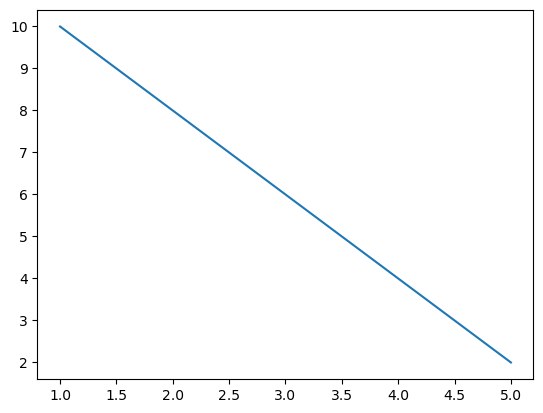

In [ ]:
# 47. Побудуй простий лінійний графік:  

x = [1, 2, 3, 4, 5]  
y = [10, 8, 6, 4, 2]  
plt.plot(x, y)  
plt.show()  

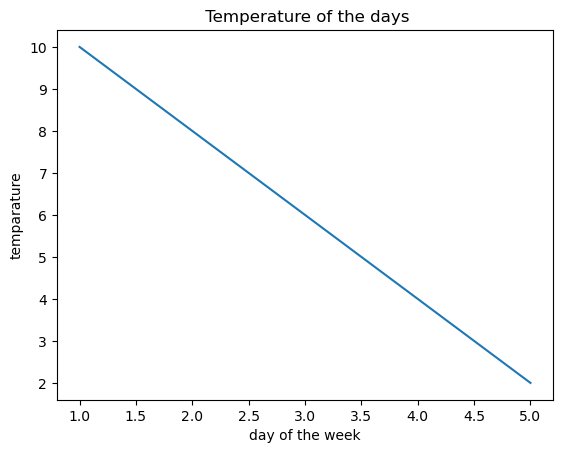

In [ ]:
# 48. Додай підписи осей (`xlabel`, `ylabel`) і заголовок (`title`). 

x = [1, 2, 3, 4, 5]  
y = [10, 8, 6, 4, 2]  
plt.plot(x, y)  
plt.xlabel("day of the week")
plt.ylabel("temparature")
plt.title("Temperature of the days")
plt.show()  

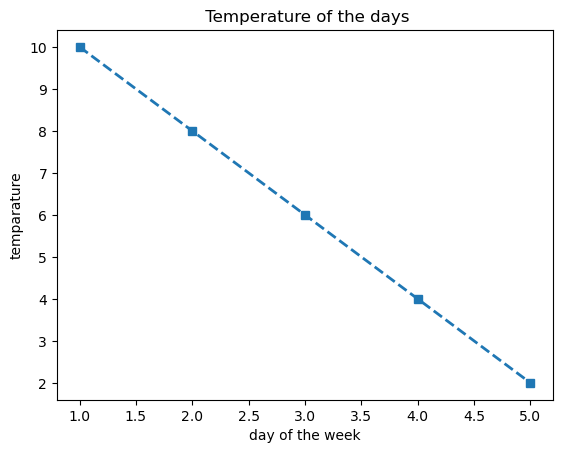

In [ ]:
# 49. Змініть зовнішній вигляд лінії: стиль (`'--'`, `'-.'`), маркери (`'o'`, `'s'`), товщину (`linewidth`)

x = [1, 2, 3, 4, 5]  
y = [10, 8, 6, 4, 2]  
plt.plot(x, y, linestyle="--", marker="s", linewidth=2) 
plt.xlabel("day of the week")
plt.ylabel("temparature")
plt.title("Temperature of the days")
plt.show()  

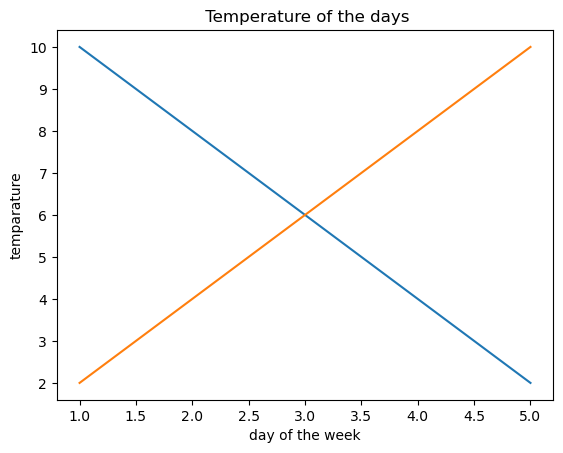

In [ ]:
# 50. Побудуй **два графіки на одному полі** (додай другий виклик `plt.plot()` перед `plt.show()`).

x = [1, 2, 3, 4, 5]  
y1 = [10, 8, 6, 4, 2]  
y2 = [2, 4, 6, 8, 10] 
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel("day of the week")
plt.ylabel("temparature")
plt.title(" Temperature of the days")
plt.show() 

## Розділ 8. Графіки з pandas + matplotlib
**Мета:** навчитися будувати графіки безпосередньо з DataFrame.

**Завдання 51–60:**
51. Створи DataFrame з продажами по місяцях: стовпці `"Month"`, `"Revenue"`.  
52. Побудуй лінійний графік `Revenue` по місяцях (`df.plot(x="Month", y="Revenue")`).  
53. Побудуй стовпчикову діаграму продажів по категоріях (`bar`).  
54. Побудуй горизонтальну стовпчикову діаграму (`barh`).  
55. Побудуй кругову діаграму (`pie`) для відсотку продажів по категоріях.  
56. Створи DataFrame з віком клієнтів і побудуй гістограму розподілу віку (`hist`).  
57. Побудуй `boxplot` для цін (`Price`).  
58. Побудуй `scatter plot` між `"Price"` і `"Quantity"`.  
59. Зміни стиль графіка (наприклад, `plt.style.use("ggplot")`).  
60. Додай підписи значень на стовпчиковому графіку (через `plt.text` або `ax.bar_label()`).  

In [ ]:
# 51. Створи DataFrame з продажами по місяцях: стовпці `"Month"`, `"Revenue"`.  

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

revenue = [12000, 15000, 18000, 17000, 21000, 19500, 22000, 25000, 24000, 26000, 30000, 32000]

сategory = [ "Electronics", "Electronics", "Office", "Office", "Clothing", "Clothing", "Electronics", "Electronics", "Office", "Clothing", "Electronics", "Office"
]

df_revenue = pd.DataFrame({"Month": months, "Сategory": сategory, "Revenue": revenue})

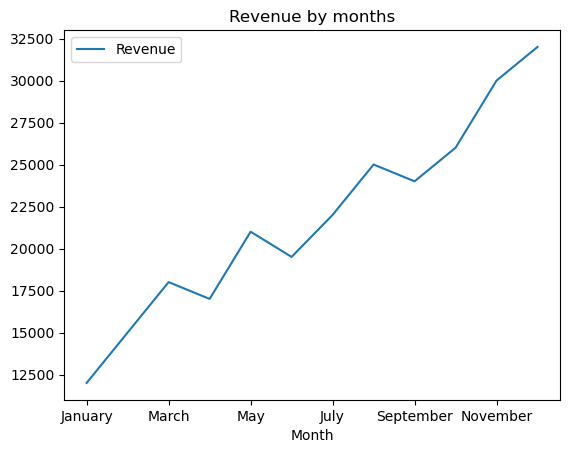

In [52]:
# 52. Побудуй лінійний графік `Revenue` по місяцях (`df.plot(x="Month", y="Revenue")`)

df_revenue.plot(x="Month", y="Revenue", title="Revenue by months")
plt.show() 

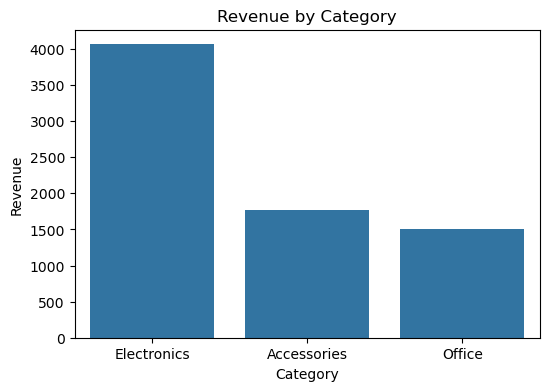

In [68]:
# 53. Побудуй стовпчикову діаграму продажів по категоріях (`bar`).  

import seaborn as sns

plt.figure(figsize=(6,4))  # розмір графіка

sns.barplot(x="Category", y="Revenue", data=df_sales,  errorbar=None)

plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")

plt.show()

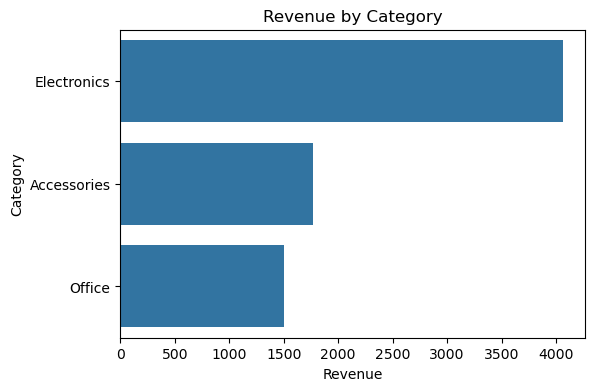

In [66]:
# 54. Побудуй горизонтальну стовпчикову діаграму (`barh`). 

plt.figure(figsize=(6,4))  # розмір графіка

sns.barplot(x="Revenue", y="Category", data=df_sales,  errorbar=None)

plt.title("Revenue by Category")
plt.xlabel("Revenue")
plt.ylabel("Category")

plt.show()

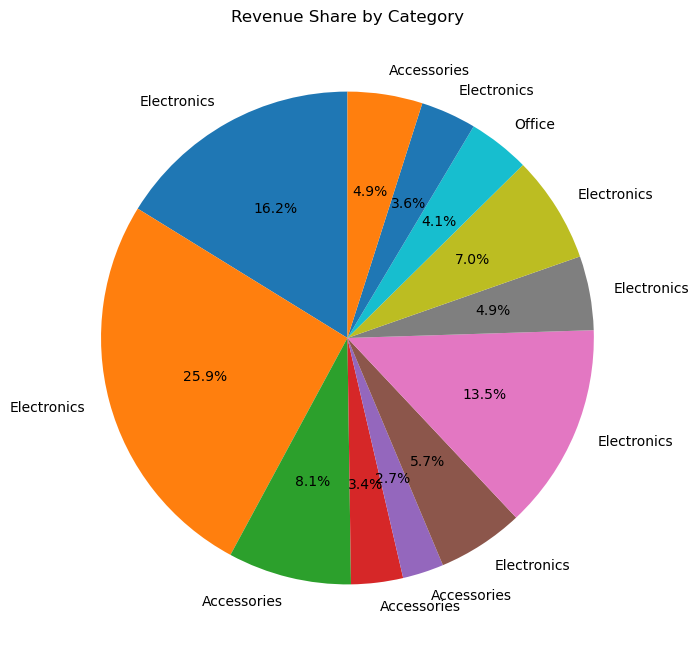

In [69]:
# 55. Побудуй кругову діаграму (`pie`) для відсотку продажів по категоріях.  

plt.figure(figsize=(8, 8))  # Розмір діаграми

plt.pie(
    df_sales["Revenue"],        # Значення
    labels=df_sales["Category"],# Підписи секторів
    autopct="%1.1f%%",          # Формат відсотків
    startangle=90               # Початковий кут (красивіше)
)

plt.title("Revenue Share by Category")
plt.show()

In [ ]:
# 56. Створи DataFrame з віком клієнтів і побудуй гістограму розподілу віку (`hist`).  
# 57. Побудуй `boxplot` для цін (`Price`).  
# 58. Побудуй `scatter plot` між `"Price"` і `"Quantity"`.  
# 59. Зміни стиль графіка (наприклад, `plt.style.use("ggplot")`).  
# 60. Додай підписи значень на стовпчиковому графіку (через `plt.text` або `ax.bar_label()`).

## Розділ 9. Комбіновані завдання (pandas + matplotlib)
**Мета:** поєднати обробку даних та візуалізацію.

**Завдання 61–70:**
61. Створи або зчитай з CSV DataFrame з даними про продажі: дата, товар, категорія, ціна, кількість, місто.  
62. Порахуйте загальний дохід по місяцях і побудуйте лінійний графік.  
63. Визнач топ-3 товари за продажами (за `Revenue`) і побудуй для них стовпчиковий графік.  
64. Побудуй порівняння доходів по містах (стовпчиковий графік).  
65. Обчисли кореляцію між числовими стовпцями (`df.corr()`) і побудуй `heatmap` (через `plt.imshow` або іншу бібліотеку).  
66. Побудуй `subplot` із двома графіками: лінійний (Revenue по місяцях) і стовпчиковий (Revenue по категоріях).  
67. Створи кілька серій даних (наприклад, Revenue за 2 роки) і побудуй їх разом на одному графіку з легендою.  
68. Побудуй графік із вторинною віссю (`twinx`): стовпчики для Revenue і лінія для середньої ціни.  
69. Збережи один із графіків у PNG-файл (`plt.savefig("sales_chart.png", dpi=300)`).  
70. Зроби зведену таблицю продажів по місяцях і побудуй її графік одразу з pandas (`pivot_table` + `.plot()`).  

In [34]:
# Розв'язання для завдань 61–70
# Твій код тут ↓